In [2]:
using NBInclude

@nbinclude("functions.ipynb")

All function imported


In [4]:
function get_test_loader(batch_size, shuffle::Bool)
    # The FashionMNIST test set is made up of 10k 28 by 28 greyscale images
    test_x, test_y = MNIST.testdata(Float32)
    test_x = 1 .- reshape(test_x, (784, :))
    return DataLoader((test_x, test_y), batchsize=batch_size, shuffle=shuffle)
end

function load_model_sep(load_dir::String, epoch::Int)
    print("Loading model...")
    @load joinpath(load_dir, "model-$epoch.bson") encoder_μ encoder_logvar W1 W2 W3 Q
    println("Done")
    return encoder_μ, encoder_logvar, W1, W2, W3, Q
end

function load_model_identity(load_dir::String, epoch::Int)
    print("Loading model...")
    @load joinpath(load_dir, "model-$epoch.bson") encoder_μ encoder_logvar decoder decoder_last
    println("Done")
    return encoder_μ, encoder_logvar, decoder, decoder_last
    
end

load_model_identity (generic function with 1 method)

In [5]:
# save("saved_data/Phase_plot_full_MNIST.jld", "phase_matrix_recovery", phase_matrix_recovery, "phase_matrix_recon", phase_matrix_recon, "α_list", α_list, "m_list", m_list, "trials", trials)

## low coherence is with last layer of regularized GNN

phase_matrix_recovery =load("saved_data/Phase_plot_full_MNIST.jld", "phase_matrix_recovery")
phase_matrix_recon =load("saved_data/Phase_plot_full_MNIST.jld", "phase_matrix_recon")
α_list =load("saved_data/Phase_plot_full_MNIST.jld", "α_list")
m_list =load("saved_data/Phase_plot_full_MNIST.jld", "m_list")
trials =load("saved_data/Phase_plot_full_MNIST.jld", "trials")

## low coherence is with random matrix

# phase_matrix_recovery =load("saved_data/Phase_plot_MNIST_paper_v4.jld", "phase_matrix_recovery")
# phase_matrix_recon =load("saved_data/Phase_plot_MNIST_paper_v4.jld", "phase_matrix_recon")
# α_list =load("saved_data/Phase_plot_MNIST_paper_v4.jld", "α_list")
# m_list =load("saved_data/Phase_plot_MNIST_paper_v4.jld", "m_list")
# trials =load("saved_data/Phase_plot_MNIST_paper_v4.jld", "trials")

20

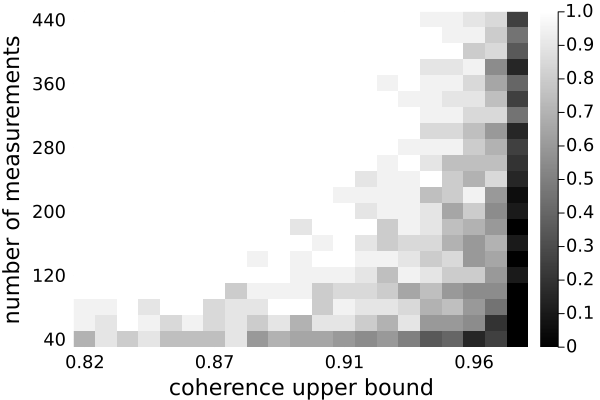

In [7]:
M = zeros(size(phase_matrix_recon[1,:,:]))
for trial in 1:trials
    M += (phase_matrix_recovery[trial,:,:] .< 1e-5)
end

# p1 = plot(colorview(Gray, reverse(M/trials, dims = 1)), bg =:black, title = "recovery of signal G(z₀)",framestyle = :box)
plot(heatmap(M/trials, c =:gist_gray),bg =:white,framestyle = :box, showaxis =:false,  xlabel = "coherence upper bound", ylabel = "number of measurements",  xlabelfontsize = 15, ylabelfontsize = 15, xtickfontsize = 12, ytickfontsize = 12  )
xticks = 1:6:length(α_list)
xticks!(xticks, ["$(round.(α_list, digits = 2)[i])" for i in 1:6:length(α_list)])
yticks = 1:4:length(m_list)
yticks!(yticks, ["$(m_list[i])" for i in 1:4:length(m_list)])


# savefig("figures/Phase_plot_Full_MNIST_percentage_paper_v2.pdf")


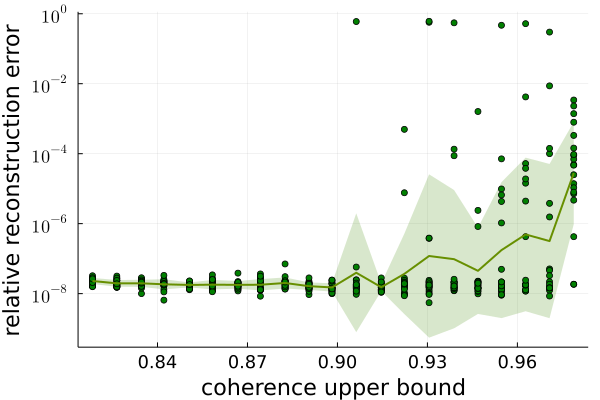

In [10]:

recon_error_matrix = phase_matrix_recon[:,7,:]

log_recon_error_matrix = log10.(recon_error_matrix)
average_recon = mean(log_recon_error_matrix, dims=1)'
std_recon = std(log_recon_error_matrix, dims=1)'
plot(α_list, average_recon + std_recon, fillrange = average_recon - std_recon, fillalpha = .2, c = cs[440], label = false, linecolor = invisible())
scatter!(kron(α_list',ones(trials,1))[:], log_recon_error_matrix[:], label =:false, c = cs[500])
plot!(α_list, average_recon, xlabel = "coherence upper bound", ylabel = "relative reconstruction error", linewidth = 2, color = cs[1000], label =false, c = cs[400],  xlabelfontsize = 15, ylabelfontsize = 15, xtickfontsize = 12, ytickfontsize = 12  )
yticks = [-8:2:0;]
yticks!(yticks, [L"10^{%$y}" for y in yticks])

# savefig("figures/MNIST_error_80_meas_paper_v2.pdf")




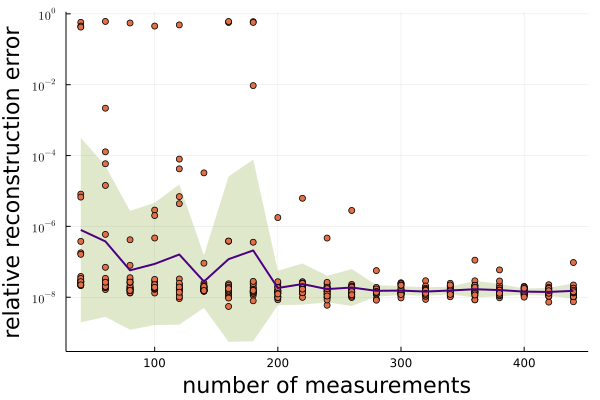

In [18]:

recon_error_matrix = phase_matrix_recon[:,:,15]

log_recon_error_matrix = log10.(recon_error_matrix)
average_recon = mean(log_recon_error_matrix, dims=1)'
std_recon = std(log_recon_error_matrix, dims=1)'
plot(m_list, average_recon + std_recon, fillrange = average_recon - std_recon, fillalpha = .2, c = cs[400], label = false, linecolor = invisible())
scatter!(kron(m_list',ones(trials,1))[:], log_recon_error_matrix[:], label =:false)
plot!(m_list, average_recon, xlabel = "number of measurements", ylabel = "relative reconstruction error", linewidth = 2, color = cs[1000], label =false, xlabelfontsize = 15, ylabelfontsize = 15 )
yticks = [-8:2:0;]
yticks!(yticks, [L"10^{%$y}" for y in yticks])


# plot(p1,p2,layout = 2, ylims = (minimum([ylims(p1)[1],ylims(p2)[1]]), maximum([ylims(p1)[2],ylims(p2)[2]]) ))



In [32]:
m_list[4]

100